In [15]:
import wandb
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import umap
import wandb

In [16]:
data = df = pd.read_json(
    "../../data_v3/data/preprocessed_tracks.jsonl", lines=True)

already dropped explicit

In [17]:
numerical_columns = ['popularity', 'duration_ms', 
                     'danceability', 'energy', 'key', 'loudness',
                     'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                     'valence', 'tempo', 'popularity_from_sessions', 'release_date_numeric']


In [18]:
data_numerical = data[numerical_columns].copy()

In [19]:
dbscan = DBSCAN(eps=10, metric="euclidean")
dbscan.fit(data_numerical)

DBSCAN(eps=10)

In [20]:
data_numerical['dbscan_labels'] = dbscan.labels_

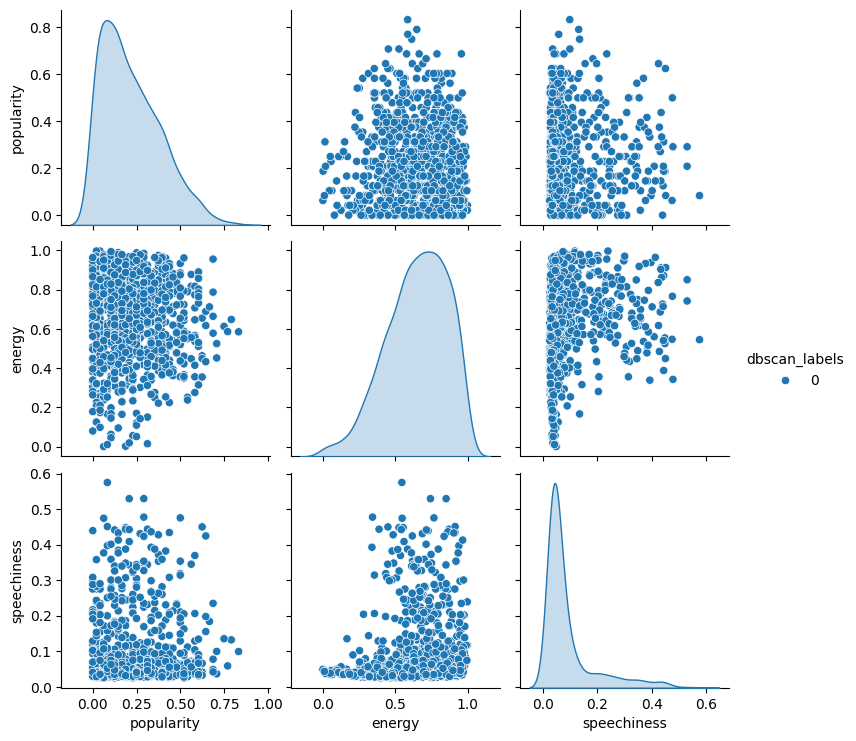

In [21]:
sns.pairplot(data_numerical[["popularity", "energy", "speechiness", "dbscan_labels"]].sample(1000), hue="dbscan_labels")

In [22]:
reducer = umap.UMAP()

In [23]:
sampled_df = data_numerical.sample(1000)

In [24]:
embedding = reducer.fit_transform(sampled_df.drop(columns=['dbscan_labels']))

In [25]:
embedding.shape

(1000, 2)

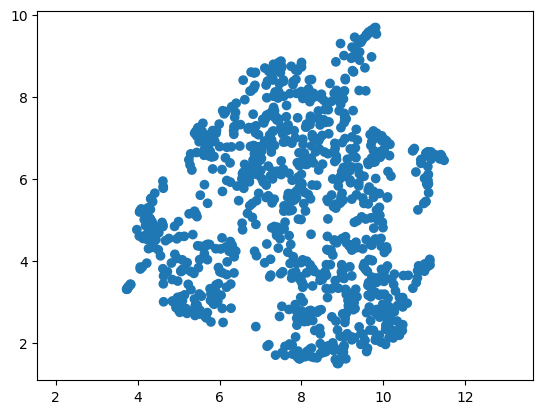

In [26]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in sampled_df['dbscan_labels']])
plt.gca().set_aspect('equal', 'datalim')

In [27]:
silhouette_score(data_numerical.drop(columns=['dbscan_labels']), data_numerical['dbscan_labels'])

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [ ]:
data_numerical['dbscan_labels'].value_counts()

dbscan_labels
 0    22398
-1       14
Name: count, dtype: int64